In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd

In [22]:
# Read the dataset as a Pandas dataframe in memory
# Note: here, we only read the first 100K rows. Other sampling options are available
dataset_next_best_comm_data = dataiku.Dataset("date_aggregation")
df = dataset_next_best_comm_data.get_dataframe(limit=100000)

In [23]:
def outlier_catch(df,column,mean):
    for i in range(len(df[column])):
            if df[column][i] > 2*mean:
                df[column][i] = mean
    return df[column]

In [24]:
df['email_date'] = pd.to_datetime(df['email_date']) - pd.to_timedelta(7, unit='d')

df_wk = df.groupby(pd.Grouper(key='email_date', freq='W-MON'))['sum_email_adobe_sends',
                                                               'sum_mail_adobe_sends',
                                                               'sum_email_adobe_clicks',
                                                               'sum_mail_adobe_clicks',
                                                               'sum_email_adobe_open',
                                                               'sum_mail_adobe_open',
                                                               'sum_email_adobe_unsub',
                                                               'sum_mail_adobe_unsub',   
                                                               'sum_email_sys',
                                                               'sum_mail_sys',
                                                               'sum_email_sys_clicks',
                                                               'sum_mail_sys_clicks',
                                                               'sum_email_sys_open',
                                                               'sum_mail_sys_open',
                                                               'sum_email_sys_unsub',
                                                               'sum_mail_sys_unsub',
                                                               'sum_email_crf',
                                                               'sum_mail_crf',
                                                               'sum_email_crf_clicks',
                                                               'sum_mail_crf_clicks',
                                                               'sum_email_crf_open',
                                                               'sum_mail_crf_open',
                                                               'sum_email_crf_unsub',
                                                               'sum_mail_crf_unsub'].sum().reset_index().sort_values('email_date')
df_wk = df_wk.set_index(pd.DatetimeIndex(df_wk['email_date']))

print (df_wk.head())

           email_date  sum_email_adobe_sends  sum_mail_adobe_sends  sum_email_adobe_clicks  sum_mail_adobe_clicks  sum_email_adobe_open  sum_mail_adobe_open  sum_email_adobe_unsub  sum_mail_adobe_unsub  sum_email_sys  sum_mail_sys  sum_email_sys_clicks  sum_mail_sys_clicks  sum_email_sys_open  sum_mail_sys_open  sum_email_sys_unsub  sum_mail_sys_unsub  sum_email_crf  sum_mail_crf  sum_email_crf_clicks  sum_mail_crf_clicks  sum_email_crf_open  sum_mail_crf_open  sum_email_crf_unsub  sum_mail_crf_unsub
email_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [25]:
for i in df.columns[1:]:
    df_wk[i] = outlier_catch(df_wk,i,df_wk[i].mean())

/data4/dataiku/condaenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


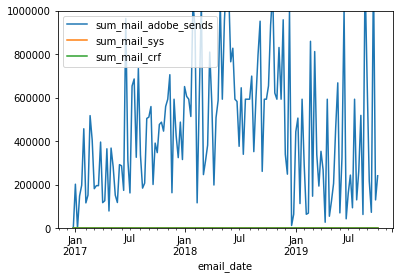

In [36]:
df_wk[['sum_mail_adobe_sends','sum_mail_sys','sum_mail_crf']].plot(ylim=(0,1000000))

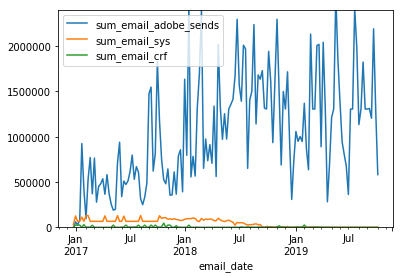

In [29]:
df_wk[['sum_email_adobe_sends','sum_email_sys','sum_email_crf']].plot(ylim=(0,2400000))

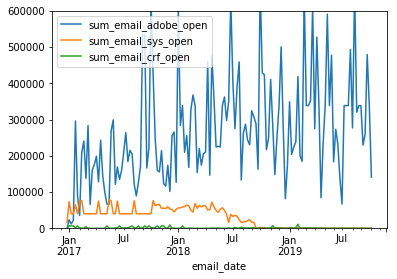

In [31]:
df_wk[['sum_email_adobe_open','sum_email_sys_open','sum_email_crf_open']].plot(ylim=(0,600000))

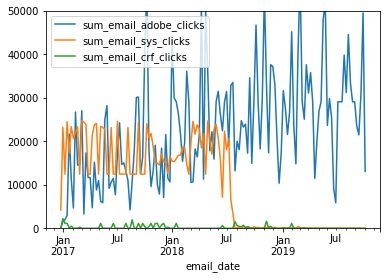

In [32]:
df_wk[['sum_email_adobe_clicks','sum_email_sys_clicks','sum_email_crf_clicks']].plot(ylim=(0,50000))

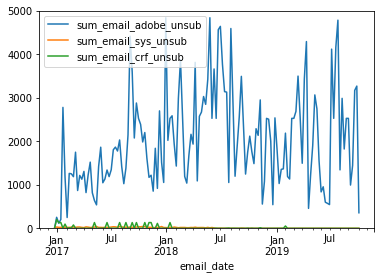

In [34]:
df_wk[['sum_email_adobe_unsub','sum_email_sys_unsub','sum_email_crf_unsub']].plot(ylim=(0,5000))